# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# Import passengers.csv and set it as a time-series object. Plot the TS
data = pd.read_csv('passengers.csv')
data.Month = pd.to_datetime(data.Month)
data.set_index(data.Month, inplace =True)
data.drop('Month', axis =1, inplace =True)

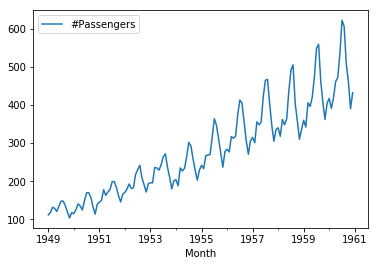

In [11]:
ts = data.copy()
ts.plot()

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [14]:
data[data.columns[0]].rolling(window=12, center=False).mean()

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
1950-04-01    128.833333
1950-05-01    129.166667
1950-06-01    130.333333
1950-07-01    132.166667
1950-08-01    134.000000
1950-09-01    135.833333
1950-10-01    137.000000
1950-11-01    137.833333
1950-12-01    139.666667
1951-01-01    142.166667
1951-02-01    144.166667
1951-03-01    147.250000
1951-04-01    149.583333
1951-05-01    153.500000
1951-06-01    155.916667
                 ...    
1958-07-01    376.333333
1958-08-01    379.500000
1958-09-01    379.500000
1958-10-01    380.500000
1958-11-01    380.916667
1958-12-01    381.000000
1959-01-01    382.666667
1959-02-01    384.666667
1959-03-01    388.3

In [41]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts, wd = 8):
    """
        ts = time series in pd.Series,Not pd.DataFrame 
        wd = # points in a window
        
        return:plot with rolling mean and std, Dickey-Fuller Test result
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    from statsmodels.tsa.stattools import adfuller
    rolmean = ts.rolling(window =wd, center = False).mean()
    rolstd = ts.rolling(window = wd, center = False).std()
    fig = plt.figure(figsize = (12, 6))
    orig = plt.plot(ts, color ='blue', label = 'Original')
    mean = plt.plot(rolmean, color ='red', label ='Rolling Mean')
    std = plt.plot(rolstd, color ='black', label ='Rolling Std')
    plt.legend(loc ='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index =['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of observation'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    return(dfoutput)

Use your newly created function on the airpassenger data set.

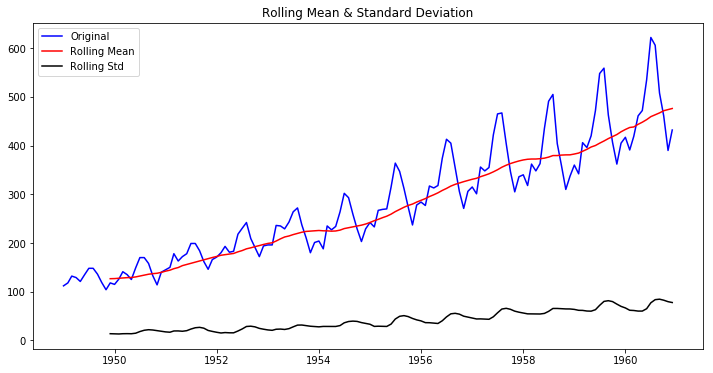

Test Statistic             0.815369
p-value                    0.991880
#Lags Used                13.000000
Number of observation    130.000000
Critical Value(1%)        -3.481682
Critical Value(5%)        -2.884042
Critical Value(10%)       -2.578770
dtype: float64

In [22]:
# Code here
stationarity_check(data[data.columns[0]])

## Perform a log() and sqrt() transform

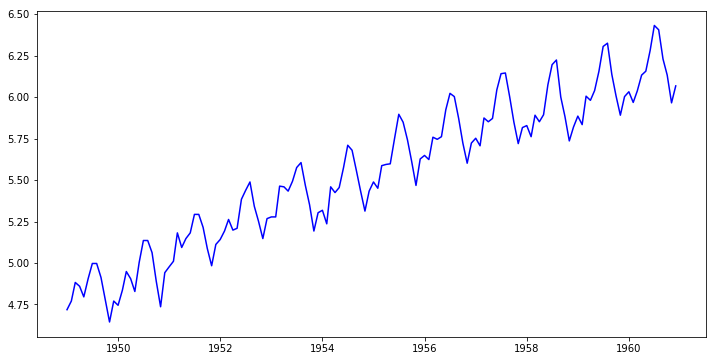

In [27]:
# Log transform timeseries and compare with original to check the effect
logdata = pd.Series(np.log(data[data.columns[0]]), index = data.index)
fig = plt.figure(figsize =(12,6))
plt.plot(logdata, color ='blue')

def log_trans(ts):
    log_ts =pd.Series(ts, index = ts.index)
    fig = plt.figure(figsize =(12,6))
    plt.plot(log_ts, color ='blue')
    return log_ts 


moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

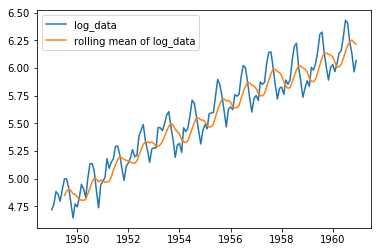

In [33]:
# your code here
rolmean = logdata.rolling(window = 7 , center = False).mean()

plt.plot(logdata,label='log_data')
plt.plot(rolmean, label ='rolling mean of log_data')
plt.legend()
plt.show()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [35]:
# Subtract the moving average from the original data and check head for Nans
diff_logdata_rolmean = logdata-rolmean
diff_logdata_rolmean.head(10)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.150059
1949-08-01    0.110242
1949-09-01    0.005404
1949-10-01   -0.113317
Name: #Passengers, dtype: float64

In [36]:
# Drop the NaN values from timeseries calculated above
diff_logdata_rolmean.dropna(inplace = True)

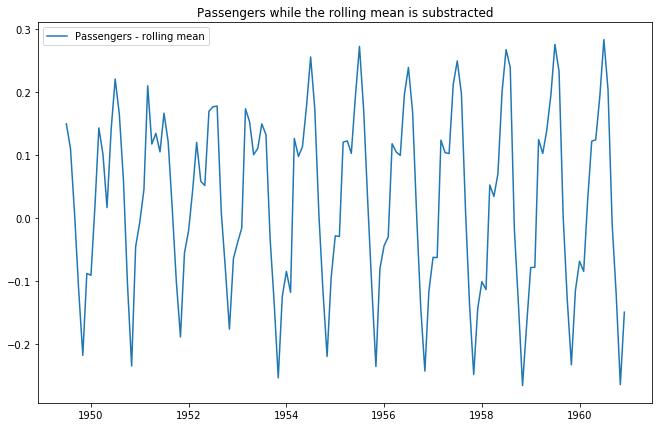

In [37]:
# Plot the result
fig = plt.figure(figsize =(11,7))
plt.plot(diff_logdata_rolmean, label='Passengers - rolling mean')
plt.legend(loc='best')
plt.title('Passengers while the rolling mean is substracted')
plt.show()

Finally, use your function `stationarity_check` to see if this series is considered stationary!

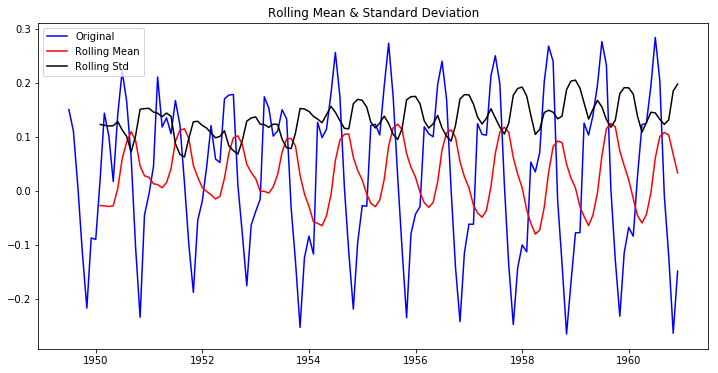

Results of Dickey-Fuller Test:
Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [47]:
stationarity_check(diff_logdata_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here
# the time series is not stationary, as the p-value is still substantial 

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

Text(0.5, 1.0, 'Exponentially Weighted Rolling Mean ')

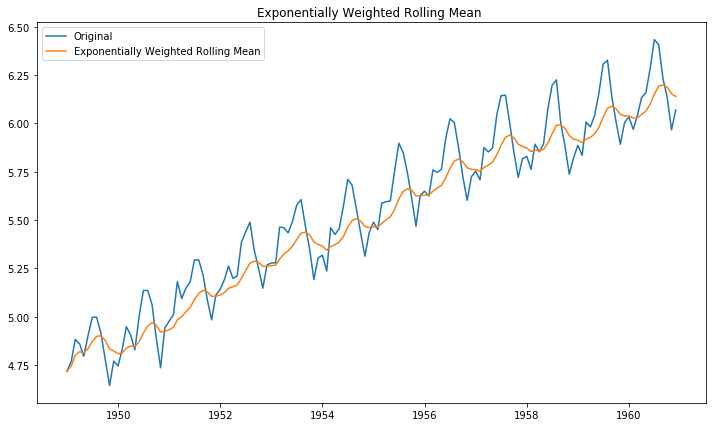

In [48]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = logdata.ewm(halflife=4).mean()
# Plot the original data with exp weighted average
fig = plt.figure(figsize =(12,7))
org = plt.plot(logdata, label='Original')
mean = plt.plot(exp_rolmean, label ='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean ')

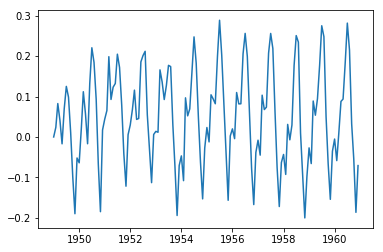

In [58]:
# Subtract the moving average from the original data and plot
diff_logdata_exp_rolmean = logdata-exp_rolmean
plt.plot(diff_logdata_exp_rolmean)

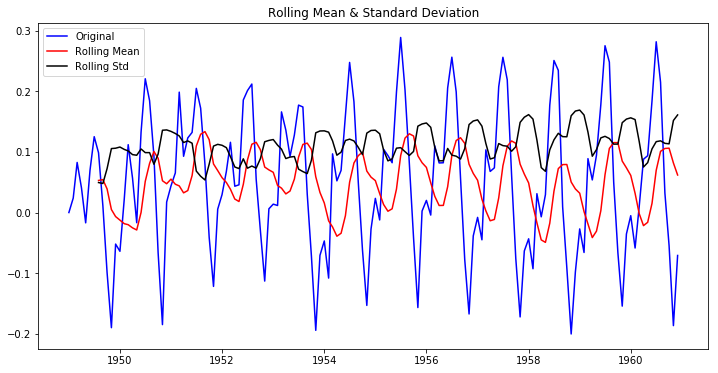

Results of Dickey-Fuller Test:
Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [59]:
# do a stationarity check
stationarity_check(diff_logdata_exp_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# Your conclusion here
# it is stationary with 95% confidence
#still strong seasonality

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [61]:
# difference your data and look at the head
data_diff = diff_logdata_exp_rolmean.diff(periods =12)
data_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01         NaN
1950-01-01   -0.063907
1950-02-01   -0.001185
1950-03-01    0.029307
Name: #Passengers, dtype: float64

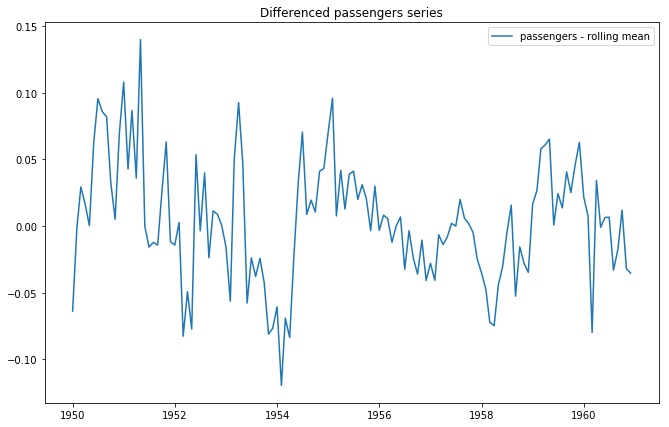

In [62]:
# plot your differenced time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, label ='passengers - rolling mean')
plt.legend(loc ='best')
plt.title('Differenced passengers series')
plt.show()

In [63]:
# drop nas
data_diff.dropna(inplace=True)

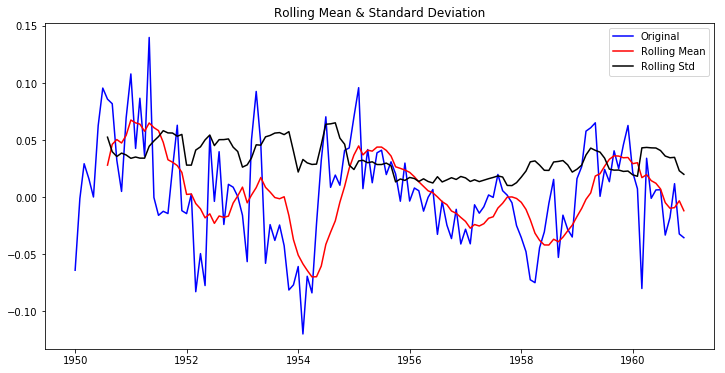

Results of Dickey-Fuller Test:
Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [64]:
# perform the stationarity check
stationarity_check(data_diff)

### Your conclusion

In [ ]:
# Your conclusion here

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.